<a href="https://colab.research.google.com/github/Giuseppe31-s/Macroeconomia/blob/main/Taxa_de_desemprego_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculando taxa de desemprego natural



In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###Entendendo os dados.

Para calcular a taxa natural de desemprego é preciso entender o que ela é. Por definição, a taxa natural de desemprego é a taxa de desemprego em que o nível de preço efetivo é igual ao nível esperado dos preços. A taxa natural de desemprego é a taxa de desemprego em que a taxa de inflação efetiva é igual à taxa de  inflação esperada. Logo vamos usar o IPCA-15.
 
Importando taxa de desocupação apenas para fins comparativos 

In [2]:
#importando dados
url = 'https://raw.githubusercontent.com/Giuseppe31-s/Macroeconomia/main/dados/ipca-15_2018_2021.csv'
ipca_15 = pd.read_csv(url,decimal = ',',sep = ';')
url1 = 'https://raw.githubusercontent.com/Giuseppe31-s/Macroeconomia/main/dados/taxa_desocupa%C3%A7%C3%A3o.csv'
taxa_desocupação = pd.read_csv(url1,sep =';',decimal = ',')

In [3]:
#adicionando data aos nossos dados
ipca_15['data'] = pd.date_range(start = '01/01/2018', periods=len(ipca_15), freq='M')
ipca_15= ipca_15[['data','IPCA-15']]
ipca_15.head()

,data,IPCA-15
0,2018-01-31,3.02
1,2018-02-28,2.86
2,2018-03-31,2.80
3,2018-04-30,2.80
4,2018-05-31,2.70


In [4]:
# modificando dados
taxa_desocupação['data'] = pd.date_range(start = '03/01/2020', periods=len(taxa_desocupação), freq='M')
taxa_desocupação.head()
taxa_desocupação= taxa_desocupação[['data','Taxa de desocupação em %']]
taxa_desocupação.rename(columns={'Taxa de desocupação em %':'taxa desocupação %'},inplace = True)
taxa_desocupação.head()

,data,taxa desocupação %
0,2020-03-31,12.2
1,2020-04-30,12.6
2,2020-05-31,12.9
3,2020-06-30,13.3
4,2020-07-31,13.8


resolvendo taxa natural $U _{n}$:

$U_{u} = \frac{m+z}{\alpha } 
$

quanto maior a margem ,m , ou quanto maiores os fatores que afetam a fixação dos salários, z, mais alta será a taxa natural de desemprego.

$\pi _{t}-\pi _{t}^{e} = -\alpha  (U_{n} - \frac{m+z}{\alpha})$

$\pi _{t}-\pi _{t}^{e} = -\alpha(U_{t}-U_{n})$

**Aqui entra a parte fundamental deste tópico**

a taxa de inflação esperada $\pi _{t}^{e}$ pode ser aproximada a taxa de inflação do ano anterior:

***$ \pi _{t}-\pi _{t-1} = -\alpha(U_{t}-U_{n})$***

A taxa natural de desemprego é a taxa de desemprego necessária para manter a taxa de inflação constante 








In [5]:
# separando ano anterior
a_2019 = ipca_15.iloc[14:24,1]
a_2019 = a_2019.reset_index()
del a_2019['index']
a_2019.head()


,IPCA-15
0,4.18
1,4.71
2,4.93
3,3.84
4,3.27


In [6]:
#sepando ipca
b_2020 = ipca_15.iloc[26:36,1]
b_2020 = b_2020.reset_index()
del b_2020['index']
b_2020.head()



,IPCA-15
0,3.67
1,2.92
2,1.96
3,1.92
4,2.13


In [7]:
#calculando a variação
taxa_Desemprego_natural =b_2020/a_2019

In [8]:
taxa_Desemprego_natural.head()

,IPCA-15
0,0.877990
1,0.619958
2,0.397566
3,0.500000
4,0.651376


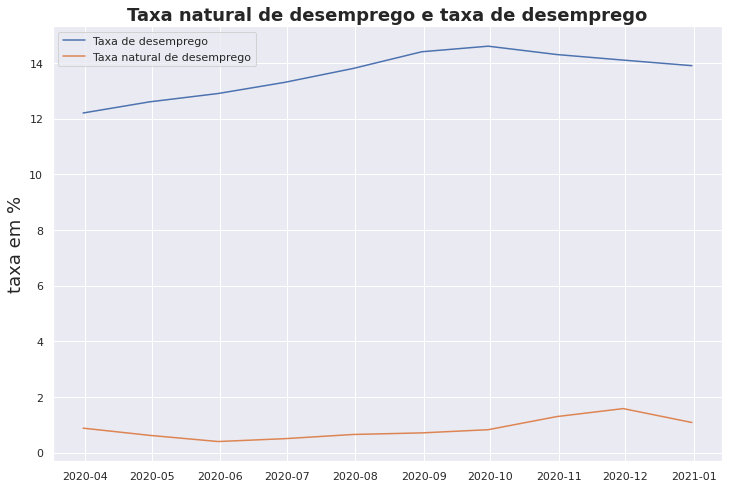

In [9]:
# gráfico
sns.set_theme(context='notebook')
plt.figure(figsize=(12,8))
plt.plot(taxa_desocupação['data'],taxa_desocupação['taxa desocupação %'], label = 'Taxa de desemprego' )
plt.plot(taxa_desocupação['data'],taxa_Desemprego_natural['IPCA-15'], label = 'Taxa natural de desemprego')
plt.ylabel('taxa em %', fontdict = {'fontsize':18})
plt.title('Taxa natural de desemprego e taxa de desemprego', fontdict={'fontsize':18,'fontweight':'bold'})
plt.legend();